## Regression with avg pool

### Import and env settings

In [20]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt

import os

In [21]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

### Variables/parameters used in this notebook

In [22]:
file = '../../data/home_sale_data_324_features_raw_price.csv'

ckpt_path = "./ckpt/reg_lr005/"
os.makedirs(ckpt_path, exist_ok=True)

lr = 0.005
epochs = 120

### Prepare data

In [23]:
data = pd.read_csv(file)

'''suffle rows randomly'''
data = data.sample(frac=1)

labels = data['label']

data.head()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3,label
589,0.555556,0.343848,0.171494,0.4,0.163872,0.282258,0.926316,0.264504,0.381677,0.949275,0.25,0.883333,1.0,0.309164,0.0,1.0,0.0,0.0,1.0,0.361371,0.224093,1.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,140000.00
1520,0.555556,0.483879,0.261800,0.2,0.163872,0.188172,0.642105,0.254523,0.365900,0.550725,0.25,0.900000,0.0,0.421336,0.0,0.0,0.0,0.0,0.0,0.000000,0.453207,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,138571.19
1124,0.444444,0.381263,0.189291,0.4,0.163872,0.451613,0.684211,0.291953,0.422182,0.782609,0.25,0.500000,0.0,0.309164,0.0,0.0,0.0,0.0,0.0,0.371257,0.111480,1.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,140000.00
2696,0.444444,0.400287,0.198997,0.2,0.001104,0.208333,0.526316,0.306925,0.442702,0.673913,0.25,0.250000,0.0,0.421336,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,114518.71
1745,0.444444,0.579871,0.317066,0.4,0.088659,0.295699,0.547368,0.489083,0.633984,0.688406,0.25,0.283333,0.0,0.600315,0.0,0.0,0.0,0.0,0.0,0.000000,0.307674,0.0,0.0,0.229601,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,148364.31


In [24]:
# drop label column
data.drop(['label'], axis=1, inplace=True)
data.describe()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,Neighborhood_IDOTRR,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.0
mean,0.565136,0.542763,0.293431,0.353143,0.200863,0.317285,0.660811,0.326706,0.487996,0.719569,0.391876,0.570892,0.447956,0.542786,0.512882,0.335967,0.087255,0.171718,0.511508,0.159954,0.203170,0.290622,0.069392,0.176542,0.245620,...,0.031261,0.652697,0.082102,0.106493,0.054277,0.054277,0.054277,0.053590,0.047750,0.637582,0.073514,0.423222,0.158708,0.293370,0.066644,0.266919,0.605634,0.421848,0.439368,0.487118,0.511852,0.616627,0.0,0.0,0.0
std,0.155988,0.125193,0.119772,0.152244,0.133043,0.143976,0.242686,0.131930,0.131369,0.219351,0.138140,0.348189,0.497369,0.128554,0.499920,0.472409,0.282257,0.181727,0.499953,0.218350,0.163524,0.454127,0.254163,0.183129,0.430528,...,0.174051,0.476195,0.274568,0.308520,0.226602,0.226602,0.226602,0.225245,0.213273,0.480781,0.261024,0.494155,0.365467,0.455385,0.249447,0.442425,0.488798,0.493939,0.496395,0.499920,0.499945,0.486292,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.444444,0.451636,0.213557,0.200000,0.088659,0.215054,0.473684,0.247193,0.395003,0.590580,0.250000,0.250000,0.000000,0.421336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.555556,0.547807,0.282326,0.400000,0.164976,0.322581,0.652632,0.308172,0.481664,0.731884,0.500000,0.716667,0.000000,0.516936,1.000000,0.000000,0.000000,0.293793,1.000000,0.000000,0.179849,0.000000,0.000000,0.180865,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
75%,0.666667,0.621247,0.356447,0.400000,0.252530,0.387097,0.905263,0.405490,0.582574,0.934783,0.500000,0.900000,1.000000,0.600315,1.000000,1.000000,0.000000,0.293793,1.000000,0.353218,0.327089,1.000000,0.000000,0.309510,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [25]:
labels.describe()

count      2911.000000
mean     180161.314822
std       78538.134736
min       34900.000000
25%      129082.035000
50%      160200.000000
75%      212000.000000
max      755000.000000
Name: label, dtype: float64

In [26]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

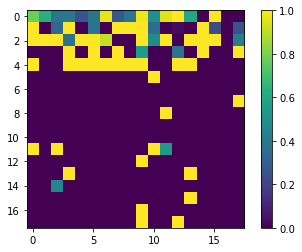

In [27]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [28]:
'''because we don't use one-hot encoding in reggresion, need to change labels from pandas series to np array'''
labels = labels.to_numpy()
labels.shape

(2911,)

In [29]:
all_examples = data_np
all_examples.shape

(2911, 18, 18)

#### train test splitting
- hold out 15% for testing
- use 85% to train model with K-fold CV

In [30]:
ttl_samples = all_examples.shape[0] 
test_ratio = 0.15
test_samples = int(test_ratio * all_examples.shape[0])

train_examples = all_examples[:-1*test_samples]
test_examples = all_examples[-1*test_samples:]
train_labels = labels[:-1*test_samples]
test_labels = labels[-1*test_samples:]


In [31]:
print('train: ', train_examples.shape)
print('test: ', test_examples.shape)
print('train label: ', train_labels.shape)
print('test label: ', test_labels.shape)

train:  (2475, 18, 18)
test:  (436, 18, 18)
train label:  (2475,)
test label:  (436,)


### Prepare model

In [32]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def create_reg_model(lr=0.005):

	# Working
	with tf.device('/cpu:0'):
		data_augmentation = tf.keras.Sequential([ 
			tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
	  		tf.keras.layers.RandomRotation(0.1),
		    tf.keras.layers.RandomZoom(0.1)
			])


	model = tf.keras.Sequential([
		# data_augmentation,
	  	# tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
		tf.keras.layers.AveragePooling2D((2, 2)),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
		tf.keras.layers.MaxPooling2D((2, 2)),
		tf.keras.layers.Dropout(0.1),
	  	tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.MaxPooling2D((2,2)),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(64, activation='relu'),
		tf.keras.layers.Dense(32, activation='relu'),
		tf.keras.layers.Dense(1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
	])

	# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
	opt = tf.keras.optimizers.Adam(lr=lr)
	model.compile(optimizer=opt, loss=rmse, metrics=[rmse])

	return model


Num GPUs Available:  1


### Test trainging & visualizing result

In [33]:
# model = create_reg_model()
# model.summary()

In [34]:
# history = model.fit(train_examples, train_labels, epochs=epochs, validation_data=(test_examples, test_labels))

In [35]:
# train_rmse = history.history['rmse']
# val_rmse = history.history['val_rmse']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, train_rmse, label='Training RMSE')
# plt.plot(epochs_range, val_rmse, label='Validation RMSE')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Accuracy')


# '''How far are predictions from real values?'''
# from matplotlib.ticker import FuncFormatter

# def format_tick_labels(x, pos):
#     return '{:.0f}k'.format(x/1000)

# predictions = model.predict(test_examples)

# xlims = [0, max(test_labels)*1.1]
# ylims = [0, max(predictions)*1.1]

# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# ax.scatter(test_labels, predictions)
# ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
# ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))
# ax.set_xlim(xlims)
# ax.set_ylim(ylims)
# ax.set_xlabel('Actual Price')
# ax.set_ylabel('Predicted Price')

# ax.plot(xlims, ylims, 'r-')

### K-fold CV Training

In [36]:
from sklearn.model_selection import KFold

# modify to save ckpt for each test
ckpt = os.path.join(ckpt_path, "val_rmse_{val_rmse:.0f}.hdf5")

# training params
epochs = epochs
lr = lr

# the k for k fold CV
n_split = 10

# for recording best performance
min_loss = np.inf
best_history = None

'''
k-fold cross validation
Save the best model using validation accuracy as metric
Print the global best performace when finished
'''
for train_index, test_index in KFold(n_split).split(train_examples):

    x_train, x_vad = train_examples[train_index], train_examples[test_index]
    y_train, y_vad = train_labels[train_index], train_labels[test_index]

    model=create_reg_model(lr)
  
    # callbacks
    checkpoint_filepath = ckpt
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_loss',
        mode='auto',
        save_best_only=True,
        verbose=1
    )

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=25,
        verbose=1,
        mode='auto',
    )

    # Model weights are saved at the end of every epoch, if it's the best seen so far.
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_vad, y_vad),
                        callbacks=[model_checkpoint_callback, early_stopping_callback])

    val_loss = max(history.history['val_loss'])
    
    if val_loss < min_loss:
        min_loss = val_loss
        best_history = history
        # print('Best acc so far. Saving params...\n')

print('Finish {}-fold cross validation'.format(n_split))
print('Best performing model has {} validation loss (RMSE)'.format(min_loss))



Epoch 1/120


/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-30 15:07:13.104212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 105844.3203 - rmse: 105579.0859

2022-04-30 15:07:16.700778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 57201.09375, saving model to ./ckpt/reg_lr005/val_rmse_57395.hdf5
70/70 [==============================] - 4s 25ms/step - loss: 105844.3203 - rmse: 105579.0859 - val_loss: 57201.0938 - val_rmse: 57394.9844
Epoch 2/120
67/70 [===========================>..] - ETA: 0s - loss: 53112.5586 - rmse: 53112.5586
Epoch 2: val_loss improved from 57201.09375 to 47690.07422, saving model to ./ckpt/reg_lr005/val_rmse_47712.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 53655.5000 - rmse: 53688.4727 - val_loss: 47690.0742 - val_rmse: 47711.6758
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 47692.5859 - rmse: 47692.5859
Epoch 3: val_loss improved from 47690.07422 to 45922.51172, saving model to ./ckpt/reg_lr005/val_rmse_45911.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 47357.4180 - rmse: 47204.6367 - val_loss: 45922.5117 - val_rmse: 45910.5156
Epoch 4/120
69/70 [============================>.] - E

2022-04-30 15:08:36.472526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 106370.8438 - rmse: 106047.5781
Epoch 1: val_loss improved from inf to 53949.17188, saving model to ./ckpt/reg_lr005/val_rmse_53506.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 106370.8438 - rmse: 106047.5781 - val_loss: 53949.1719 - val_rmse: 53506.3906
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 63031.4414 - rmse: 63031.4414

2022-04-30 15:08:37.350571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66/70 [===========================>..] - ETA: 0s - loss: 55644.7539 - rmse: 55644.7539
Epoch 2: val_loss improved from 53949.17188 to 45021.09766, saving model to ./ckpt/reg_lr005/val_rmse_44639.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 55240.0859 - rmse: 55153.0859 - val_loss: 45021.0977 - val_rmse: 44639.1250
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 47239.3242 - rmse: 47239.3242
Epoch 3: val_loss improved from 45021.09766 to 40119.09375, saving model to ./ckpt/reg_lr005/val_rmse_39686.hdf5
70/70 [==============================] - 1s 9ms/step - loss: 47339.1328 - rmse: 47501.2148 - val_loss: 40119.0938 - val_rmse: 39685.7305
Epoch 4/120
65/70 [==========================>...] - ETA: 0s - loss: 48165.6055 - rmse: 48165.6055
Epoch 4: val_loss improved from 40119.09375 to 38360.61719, saving model to ./ckpt/reg_lr005/val_rmse_37954.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 47758.6680 - rmse: 47692.1914 - val_los

2022-04-30 15:09:22.440797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 107123.0078 - rmse: 106788.5078
Epoch 1: val_loss improved from inf to 47107.16406, saving model to ./ckpt/reg_lr005/val_rmse_47207.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 107123.0078 - rmse: 106788.5078 - val_loss: 47107.1641 - val_rmse: 47207.1719
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 65061.3125 - rmse: 65061.3125

2022-04-30 15:09:23.287306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 54878.6406 - rmse: 54878.6406
Epoch 2: val_loss improved from 47107.16406 to 41392.71094, saving model to ./ckpt/reg_lr005/val_rmse_41525.hdf5
70/70 [==============================] - 1s 9ms/step - loss: 54538.4648 - rmse: 54529.8047 - val_loss: 41392.7109 - val_rmse: 41524.5859
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 48852.6172 - rmse: 48852.6172
Epoch 3: val_loss improved from 41392.71094 to 41304.21094, saving model to ./ckpt/reg_lr005/val_rmse_41505.hdf5
70/70 [==============================] - 1s 9ms/step - loss: 48903.7734 - rmse: 48790.4180 - val_loss: 41304.2109 - val_rmse: 41504.6133
Epoch 4/120
67/70 [===========================>..] - ETA: 0s - loss: 44071.9141 - rmse: 44071.9141
Epoch 4: val_loss improved from 41304.21094 to 36318.70703, saving model to ./ckpt/reg_lr005/val_rmse_36496.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 43999.9023 - rmse: 43943.7305 - val_loss

2022-04-30 15:10:24.820725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 106134.3359 - rmse: 105818.0234
Epoch 1: val_loss improved from inf to 52749.95703, saving model to ./ckpt/reg_lr005/val_rmse_52500.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 106134.3359 - rmse: 105818.0234 - val_loss: 52749.9570 - val_rmse: 52500.0156
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 63444.4297 - rmse: 63444.4297

2022-04-30 15:10:25.706104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/70 [==========================>...] - ETA: 0s - loss: 52316.4336 - rmse: 52316.4336
Epoch 2: val_loss improved from 52749.95703 to 41557.66016, saving model to ./ckpt/reg_lr005/val_rmse_41446.hdf5
70/70 [==============================] - 1s 9ms/step - loss: 52493.8711 - rmse: 52472.7344 - val_loss: 41557.6602 - val_rmse: 41446.2539
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 46836.7227 - rmse: 46836.7227
Epoch 3: val_loss improved from 41557.66016 to 38731.60547, saving model to ./ckpt/reg_lr005/val_rmse_38587.hdf5
70/70 [==============================] - 1s 9ms/step - loss: 46599.2734 - rmse: 46523.7539 - val_loss: 38731.6055 - val_rmse: 38586.9023
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 45616.7773 - rmse: 45616.7773
Epoch 4: val_loss improved from 38731.60547 to 34403.22656, saving model to ./ckpt/reg_lr005/val_rmse_34271.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 45509.2500 - rmse: 45543.2305 - val_loss

2022-04-30 15:11:45.694844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 106293.4531 - rmse: 105920.6328
Epoch 1: val_loss improved from inf to 58538.94531, saving model to ./ckpt/reg_lr005/val_rmse_57692.hdf5
70/70 [==============================] - 1s 14ms/step - loss: 106293.4531 - rmse: 105920.6328 - val_loss: 58538.9453 - val_rmse: 57692.1211
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 50938.8750 - rmse: 50938.8750

2022-04-30 15:11:46.722650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 56138.8008 - rmse: 56138.8008
Epoch 2: val_loss improved from 58538.94531 to 46554.19922, saving model to ./ckpt/reg_lr005/val_rmse_45949.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 55741.5664 - rmse: 55615.1562 - val_loss: 46554.1992 - val_rmse: 45948.8125
Epoch 3/120
70/70 [==============================] - ETA: 0s - loss: 45672.0547 - rmse: 45551.3711
Epoch 3: val_loss did not improve from 46554.19922
70/70 [==============================] - 1s 12ms/step - loss: 45672.0547 - rmse: 45551.3711 - val_loss: 50380.4492 - val_rmse: 49701.9102
Epoch 4/120
67/70 [===========================>..] - ETA: 0s - loss: 44440.4219 - rmse: 44440.4219
Epoch 4: val_loss improved from 46554.19922 to 40958.52734, saving model to ./ckpt/reg_lr005/val_rmse_40396.hdf5
70/70 [==============================] - 1s 13ms/step - loss: 44346.2031 - rmse: 44318.6172 - val_loss: 40958.5273 - val_rmse: 40396.4062
Epoch 5/120
70/70 [=====

2022-04-30 15:12:58.185624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 107500.3125 - rmse: 107197.8828

2022-04-30 15:12:59.258642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 74193.12500, saving model to ./ckpt/reg_lr005/val_rmse_73072.hdf5
70/70 [==============================] - 2s 17ms/step - loss: 107500.3125 - rmse: 107197.8828 - val_loss: 74193.1250 - val_rmse: 73071.8125
Epoch 2/120
68/70 [============================>.] - ETA: 0s - loss: 53182.1992 - rmse: 53182.1992
Epoch 2: val_loss improved from 74193.12500 to 60492.51562, saving model to ./ckpt/reg_lr005/val_rmse_59572.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 53263.8516 - rmse: 53281.5977 - val_loss: 60492.5156 - val_rmse: 59572.1719
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 45521.8984 - rmse: 45521.8984
Epoch 3: val_loss improved from 60492.51562 to 56642.93359, saving model to ./ckpt/reg_lr005/val_rmse_55808.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 45122.6953 - rmse: 45002.2383 - val_loss: 56642.9336 - val_rmse: 55808.3359
Epoch 4/120
68/70 [============================>.] - E

2022-04-30 15:14:20.368933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 100476.8906 - rmse: 100196.6562
Epoch 1: val_loss improved from inf to 57452.93359, saving model to ./ckpt/reg_lr005/val_rmse_58129.hdf5
70/70 [==============================] - 2s 12ms/step - loss: 100476.8906 - rmse: 100196.6562 - val_loss: 57452.9336 - val_rmse: 58129.3672
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 70315.7969 - rmse: 70315.7969

2022-04-30 15:14:21.277606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 49993.8594 - rmse: 49993.8594
Epoch 2: val_loss improved from 57452.93359 to 46512.82812, saving model to ./ckpt/reg_lr005/val_rmse_47003.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 50199.2383 - rmse: 50182.3750 - val_loss: 46512.8281 - val_rmse: 47003.2422
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 44612.4883 - rmse: 44612.4883
Epoch 3: val_loss improved from 46512.82812 to 43387.23047, saving model to ./ckpt/reg_lr005/val_rmse_43720.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 44794.0781 - rmse: 44764.2422 - val_loss: 43387.2305 - val_rmse: 43719.7188
Epoch 4/120
66/70 [===========================>..] - ETA: 0s - loss: 41734.6836 - rmse: 41734.6836
Epoch 4: val_loss did not improve from 43387.23047
70/70 [==============================] - 1s 11ms/step - loss: 42054.6602 - rmse: 42077.2734 - val_loss: 53919.9141 - val_rmse: 54121.0586
Epoch 5/120
66/70 [=====

2022-04-30 15:15:42.710395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 105119.3516 - rmse: 104750.5078
Epoch 1: val_loss improved from inf to 70626.94531, saving model to ./ckpt/reg_lr005/val_rmse_71158.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 105119.3516 - rmse: 104750.5078 - val_loss: 70626.9453 - val_rmse: 71158.1250
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 81538.6094 - rmse: 81538.6094  

2022-04-30 15:15:43.667165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 55957.8867 - rmse: 56000.2344
Epoch 2: val_loss improved from 70626.94531 to 53536.30469, saving model to ./ckpt/reg_lr005/val_rmse_54140.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 55957.8867 - rmse: 56000.2344 - val_loss: 53536.3047 - val_rmse: 54140.0078
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 48543.7969 - rmse: 48543.7969
Epoch 3: val_loss improved from 53536.30469 to 47339.95312, saving model to ./ckpt/reg_lr005/val_rmse_47810.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 48483.3672 - rmse: 48481.3086 - val_loss: 47339.9531 - val_rmse: 47810.4297
Epoch 4/120
70/70 [==============================] - ETA: 0s - loss: 45930.5039 - rmse: 45925.3281
Epoch 4: val_loss did not improve from 47339.95312
70/70 [==============================] - 1s 12ms/step - loss: 45930.5039 - rmse: 45925.3281 - val_loss: 51259.0430 - val_rmse: 51783.5781
Epoch 5/120
69/70 [=====

2022-04-30 15:16:37.240327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 105019.0234 - rmse: 104605.8125
Epoch 1: val_loss improved from inf to 62311.33203, saving model to ./ckpt/reg_lr005/val_rmse_62735.hdf5
70/70 [==============================] - 1s 13ms/step - loss: 105019.0234 - rmse: 104605.8125 - val_loss: 62311.3320 - val_rmse: 62734.9648
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 59185.7500 - rmse: 59185.7500

2022-04-30 15:16:38.244239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 51459.2969 - rmse: 51459.2969
Epoch 2: val_loss improved from 62311.33203 to 50268.28125, saving model to ./ckpt/reg_lr005/val_rmse_50587.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 51047.6367 - rmse: 51002.2227 - val_loss: 50268.2812 - val_rmse: 50587.3633
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 46325.6719 - rmse: 46325.6719
Epoch 3: val_loss improved from 50268.28125 to 47136.42188, saving model to ./ckpt/reg_lr005/val_rmse_47234.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 46471.3359 - rmse: 46633.4375 - val_loss: 47136.4219 - val_rmse: 47234.1094
Epoch 4/120
70/70 [==============================] - ETA: 0s - loss: 43973.5938 - rmse: 43864.6797
Epoch 4: val_loss improved from 47136.42188 to 46592.00391, saving model to ./ckpt/reg_lr005/val_rmse_46806.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 43973.5938 - rmse: 43864.6797 - val_lo

2022-04-30 15:17:40.016582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 106744.1484 - rmse: 106751.9688
Epoch 1: val_loss improved from inf to 61024.97266, saving model to ./ckpt/reg_lr005/val_rmse_60168.hdf5
70/70 [==============================] - 2s 20ms/step - loss: 106744.1484 - rmse: 106751.9688 - val_loss: 61024.9727 - val_rmse: 60168.0117
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 58422.2852 - rmse: 58422.2852

2022-04-30 15:17:41.529579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 53800.0938 - rmse: 53800.0938
Epoch 2: val_loss improved from 61024.97266 to 47552.58984, saving model to ./ckpt/reg_lr005/val_rmse_46751.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 53976.9727 - rmse: 53954.0781 - val_loss: 47552.5898 - val_rmse: 46750.7148
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 46391.2695 - rmse: 46391.2695
Epoch 3: val_loss improved from 47552.58984 to 43133.95703, saving model to ./ckpt/reg_lr005/val_rmse_42572.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 46279.9023 - rmse: 46239.8008 - val_loss: 43133.9570 - val_rmse: 42572.1523
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 43250.1914 - rmse: 43250.1914
Epoch 4: val_loss improved from 43133.95703 to 40873.59766, saving model to ./ckpt/reg_lr005/val_rmse_40463.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 43165.4844 - rmse: 43195.9258 - val_lo

### Visualize training result

2022-04-30 15:34:25.475588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


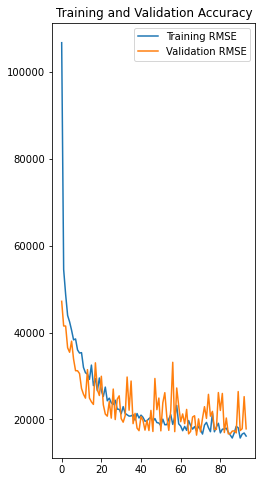

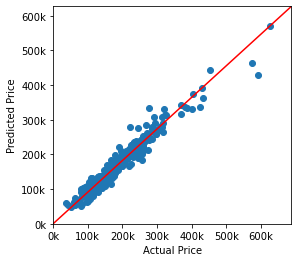

In [37]:
history = best_history

train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_rmse, label='Training RMSE')
plt.plot(epochs_range, val_rmse, label='Validation RMSE')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')


'''How far are predictions from real values?'''
from matplotlib.ticker import FuncFormatter

def format_tick_labels(x, pos):
    return '{:.0f}k'.format(x/1000)

predictions = model.predict(test_examples)

xlims = [0, max(test_labels)*1.1]
ylims = [0, max(predictions)*1.1]

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(test_labels, predictions)
ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')

ax.plot(xlims, ylims, 'r-')


### Evaluate on test data

In [44]:
model = create_reg_model()
model.load_weights(os.path.join(ckpt_path, "val_rmse_14109.hdf5"))

loss, acc = model.evaluate(test_examples, test_labels)

print('\nevaluation on test set:\nloss (RMSE) = {:.5f}'.format(loss))

11/14 [======================>.......] - ETA: 0s - loss: 16660.2539 - rmse: 16660.2539

2022-04-30 15:35:11.097369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 11ms/step - loss: 16477.6797 - rmse: 16472.5762

evaluation on test set:
loss (RMSE) = 16477.67969


In [19]:
%reset -f